<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/AI_Cuoi_ky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

In [43]:
folder = '/content/drive/MyDrive/AI_Project_CK/dataset_new/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('10_20_man'):
     output= 1.0
  if file.startswith('10_21_woman'):
    output= 2.0
  if file.startswith('21_30_man'):
    output= 3.0
  if file.startswith('21_30_woman'):
    output= 4.0
  if file.startswith('31_40_man'):
    output= 5.0
  if file.startswith('21_40_woman'):
    output= 6.0

  photo = load_img(folder + file, target_size= (96,72))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [4]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_Project_CK/thumucluumodel.h5/NhanDien_photos.npy', photos)
save('/content/drive/MyDrive/AI_Project_CK/thumucluumodel.h5/NhanDien_labels.npy', labels)

(3850, 96, 72, 3) (3850,)


In [5]:
# Split data into train & test
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [6]:
print(test_x.shape, train_x.shape)

(192, 96, 72, 3) (3658, 96, 72, 3)


In [7]:
train_x = train_x.reshape((3658, 96, 72, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((192, 96, 72, 3))
test_x = test_x.astype('float32')/255

In [8]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,7)
test_y = to_categorical(test_y,7)

In [27]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 32
epochs = 40
classes = 7

In [28]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (96, 72, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))



In [29]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 96, 72, 32)        896       
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 96, 72, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 48, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 36, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 36, 64)        36928     
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 48, 36, 64)        0         
                                                      

In [30]:
#code tăng sức mạnh
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.0,
    fill_mode='nearest')
datagen.fit(train_x)

In [31]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
115/115 [==============================] - 6s 22ms/step - loss: 1.5872 - accuracy: 0.3483
Epoch 2/40
115/115 [==============================] - 3s 22ms/step - loss: 1.3132 - accuracy: 0.4019
Epoch 3/40
115/115 [==============================] - 2s 20ms/step - loss: 1.1740 - accuracy: 0.4803
Epoch 4/40
115/115 [==============================] - 2s 21ms/step - loss: 1.0112 - accuracy: 0.5500
Epoch 5/40
115/115 [==============================] - 2s 21ms/step - loss: 0.9181 - accuracy: 0.5949
Epoch 6/40
115/115 [==============================] - 2s 21ms/step - loss: 0.8326 - accuracy: 0.6271
Epoch 7/40
115/115 [==============================] - 3s 23ms/step - loss: 0.7382 - accuracy: 0.6730
Epoch 8/40
115/115 [==============================] - 2s 22ms/step - loss: 0.6967 - accuracy: 0.6930
Epoch 9/40
115/115 [==============================] - 2s 20ms/step - loss: 0.6308 - accuracy: 0.7168
Epoch 10/40
115/115 [==============================] - 2s 21ms/step - loss: 0.5544 - accura

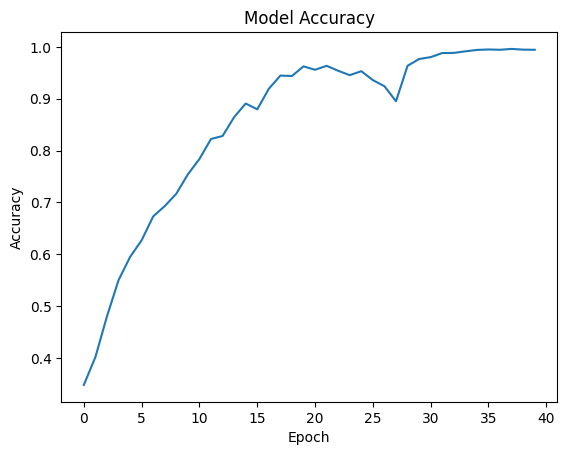

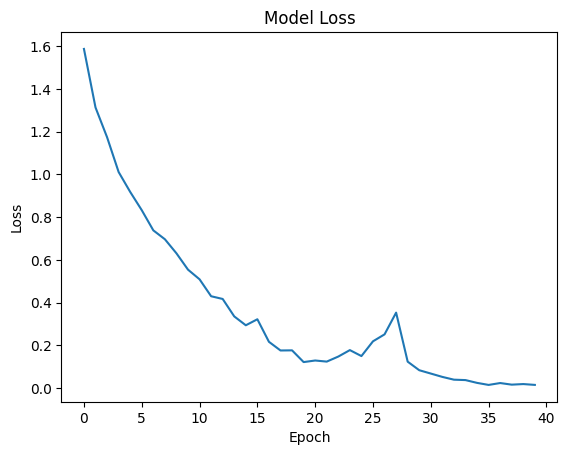

In [32]:

# Plot accuracy
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(train.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
     

In [33]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)

print('Test Accuracy:', test_accuracy)

6/6 [==============================] - 1s 19ms/step - loss: 2.8435 - accuracy: 0.5000
Test Accuracy: 0.5


In [34]:
model.save('/content/drive/MyDrive/AI_Project_CK/thumucluumodel.h5/Datanew_DuDoanModel_tien.h5')

1/1 [==============================] - 0s 23ms/step
1
nam 10-20 tuoi


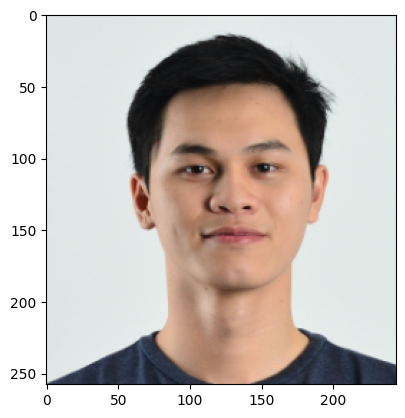

1/1 [==============================] - 0s 24ms/step
5
nam 31-40


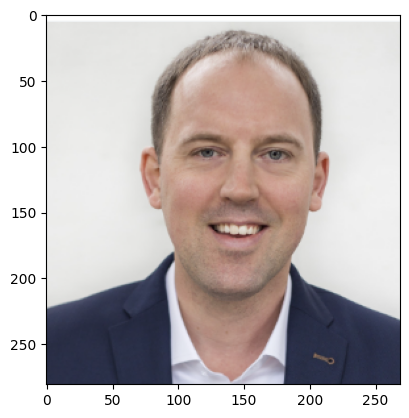

1/1 [==============================] - 0s 24ms/step
5
nam 31-40


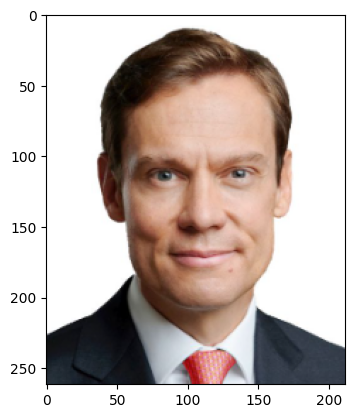

1/1 [==============================] - 0s 22ms/step
4
nữ 21-30 tuoi


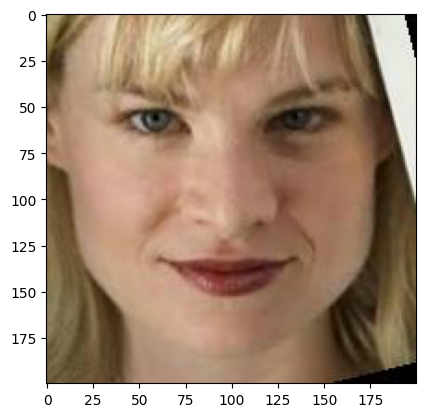

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_Project_CK/thumuctesst/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (96, 72))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  print(result)
  class_name=['', 'nam 10-20 tuoi','nữ 10-20','nam 21-30 tuoi','nữ 21-30 tuoi','nam 31-40','nữ 31-40 tuôi']
  print(class_name[result])
  plt.show()